In [4]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy import stats  
from matplotlib import cm
import math
from scipy.misc import imsave
from scipy.misc import imread
import re
import glob, os
shot = 120
picL = 18333
picR = 18158
shot = [118,119,120,232]
totalframe = [3865,4744,2098,6773]

In [3]:
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')
for ii in range(4):
    ishot = shot[ii]
    itotalframe = totalframe[ii]
    list = pd.read_csv('./Data/Shot{}/3D/list.csv'.format(ishot),header=None)
    list.columns = ['TrackL','TrackR']
    for it in range(len(list['TrackL'])):
        itL = list['TrackL'].iloc[it]
        itR = list['TrackR'].iloc[it]
        print(ishot,itL,itR)
        file = "./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair{}_{}.csv".format(ishot,ishot,itL,itR)
        df = pd.read_csv(file)
        Track2D = pd.read_csv('./Data/Shot{}/TrackPair/Pair_{}_{}.csv'.format(ishot,itL,itR))
        Track2D = Track2D[:-1]
        Track2D['InvFrame']=itotalframe-Track2D['Frame']    
        Track3D = pd.concat([df, Track2D['InvFrame']], axis=1)
        #Track3D['Time']=Track3D['InvFrame']*DeltaT
        XL=Track3D['Left xx']
        YL=Track3D['Left yy']
        XR=Track3D['Right xx']
        YR=Track3D['Right yy']
        X=Track3D['3Dxx']
        Y=Track3D['3Dyy']
        Z=Track3D['3Dzz']
        #T=Track3D['Time']
        ax.scatter(X, Y, Z, marker=".",s=1)
ax.view_init(10, 10)
ax.set_xlabel('X (m)', fontsize=40,labelpad=20)
ax.set_ylabel('Y (m)', fontsize=40,labelpad=20)
ax.set_zlabel('Z (m)', fontsize=40,labelpad=20)   
plt.savefig("./3DFit_All.pdf")
plt.show()

(118, 1020, 338)
(118, 1080, 1253)
(118, 1127, 3419)
(118, 1127, 4883)
(118, 1143, 1012)
(118, 1172, 4359)
(118, 1173, 1471)
(118, 1220, 1012)
(118, 1220, 930)
(118, 1282, 1171)
(118, 1298, 533)
(118, 13, 10)
(118, 1415, 1589)
(118, 1426, 1462)
(118, 1428, 1185)
(118, 1453, 1214)
(118, 1469, 3368)
(118, 1476, 1302)
(118, 1547, 3123)
(118, 1633, 1992)
(118, 1657, 1918)
(118, 1657, 4883)
(118, 167, 1267)
(118, 1713, 1751)
(118, 1744, 2510)
(118, 1745, 1977)
(118, 1745, 4226)
(118, 175, 1)
(118, 1764, 1795)
(118, 1772, 1915)
(118, 1778, 2707)
(118, 1782, 1957)
(118, 1816, 3627)
(118, 1840, 2345)
(118, 1894, 1895)
(118, 1903, 4180)
(118, 1952, 2208)
(118, 1976, 1909)
(118, 1988, 3977)
(118, 1999, 2230)
(118, 1, 0)
(118, 2001, 4303)
(118, 2009, 2679)
(118, 2035, 3256)
(118, 2068, 2166)
(118, 2081, 3977)
(118, 2094, 2451)
(118, 2113, 4781)
(118, 2118, 3009)
(118, 2123, 2134)
(118, 21, 13)
(118, 2218, 4205)
(118, 2235, 497)
(118, 2247, 3163)
(118, 2289, 2395)
(118, 2340, 2484)
(118, 2376, 384

KeyboardInterrupt: 

In [5]:
P1 = pd.DataFrame()
for ii in range(4):
    ishot = shot[ii]
    print(ishot)
    P0 = pd.read_csv("./Data/Shot{}/3DFitList_{}.csv".format(ishot,ishot))
    P1 = P1.append(P0)

118
119
120
232


In [21]:
P1['iX'] = 2*P1['Px2']/P1['A']
P1['iY'] = 2*P1['Py2']/P1['A']
P1['iZ'] = 2*P1['Pz2']/P1['A']
P1.head()

,Unnamed: 0,SHOT,PIDL,PIDR,Px0,Px1,Px2,Py0,Py1,Py2,...,CovZ11,CovZ12,CovZ20,CovZ21,CovZ22,A,AUnc,iX,iY,iZ
0,0,118,1020,338,0.006400,0.877719,0.915797,0.000231,2.701690,-45.486860,...,0.000857,-0.024085,0.000211,-0.024085,0.678756,102.943872,0.762467,0.017792,-0.883722,-0.467675
1,1,118,1080,1253,-0.002155,2.524762,-58.649134,-0.011022,-5.517479,128.148960,...,0.000013,-0.000562,0.000002,-0.000562,0.025445,284.857990,0.380270,-0.411778,0.899739,0.144596
2,2,118,1127,3419,0.007923,6.680258,-240.560568,-0.001129,2.364035,-72.213269,...,0.000327,-0.025966,0.000075,-0.025966,2.087139,535.944615,3.819035,-0.897707,-0.269480,-0.348573
3,3,118,1127,4883,0.008275,10.683371,-493.806223,-0.000684,2.137232,-62.632784,...,0.180419,-22.397540,0.044652,-22.397540,2785.566710,1026.980475,4443.668177,-0.961666,-0.121975,-0.245602
4,4,118,1143,1012,0.008390,1.571737,-26.586528,0.003312,2.688941,-46.875940,...,0.000122,-0.004056,0.000029,-0.004056,0.135989,107.787870,0.134262,-0.493312,-0.869781,0.011118


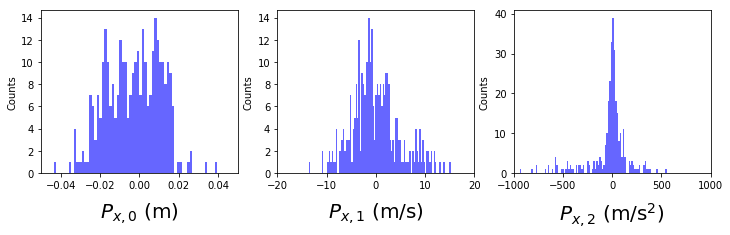

In [51]:
# Fit a normal distribution to the data of the p2 in the x-axis:
#mu, std = stats.norm.fit(P1['Px2'])
#plt.hist(P1['Px2'], bins=50, normed=True, alpha=0.6, color='b')
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#p = stats.norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
#plt.xlabel('px,2')
#plt.show()|
#print(mu,std)
#plt.hist(P1['Px0'],bins=50, normed=True, alpha=0.6, color='b')
#plt.xlabel('px,0');
#plt.show()
#plt.hist(P1['Px1'],bins=50, normed=True, alpha=0.6, color='b')
#plt.xlabel('px,1');
#plt.show()
fig = plt.figure(figsize = (12,3))  # make a new figure
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(P1['Px0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(-0.05,0.05)
ax1.set_xlabel(r'$P_{x,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(P1['Px1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-20,20)
ax2.set_xlabel(r'$P_{x,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(P1['Px2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{x,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatX_All.pdf")
plt.show()

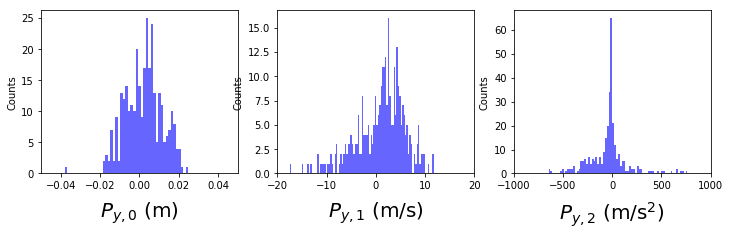

In [50]:
# Fit a normal distribution to the data of the p2 in the y-axis:
'''
mu, std = stats.norm.fit(P1['Py2'])
plt.hist(P1['Py2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('py,2')
plt.show()
print(mu,std)
plt.hist(P1['Py0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('py,0');
plt.show()
plt.hist(P1['Py1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('py,1');
plt.show()
'''
fig = plt.figure(figsize = (12,3))  # make a new figure
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(P1['Py0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(-0.05,0.05)
ax1.set_xlabel(r'$P_{y,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(P1['Py1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-20,20)
ax2.set_xlabel(r'$P_{y,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(P1['Py2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{y,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatY_All.pdf")
plt.show()

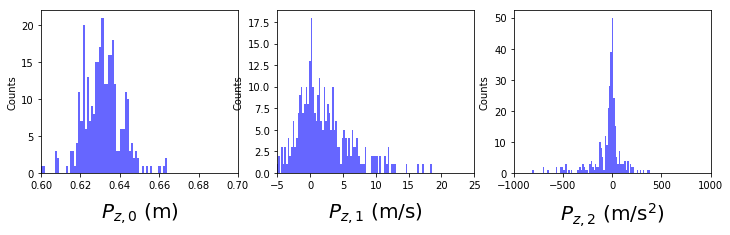

In [52]:
# Fit a normal distribution to the data of the p2 in the z-axis:
'''
mu, std = stats.norm.fit(P1['Pz2'])
plt.hist(P1['Pz2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('pz,2')
plt.show()
print(mu,std)
plt.hist(P1['Pz0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('pz,0');
plt.show()
plt.hist(P1['Pz1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('pz,1');
plt.show()
'''
fig = plt.figure(figsize = (12,3))  # make a new figure
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(P1['Pz0'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(0.6,0.7)
ax1.set_xlabel(r'$P_{z,0}$ (m)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(P1['Pz1'], bins=100, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-5,25)
ax2.set_xlabel(r'$P_{z,1}$ (m/s)', fontsize=20,labelpad=10)
ax2.set_ylabel('Counts')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(P1['Pz2'], bins=100, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1000,1000)
ax3.set_xlabel(r'$P_{z,2}$ (m/s$^2$)', fontsize=20,labelpad=10)
ax3.set_ylabel('Counts')
plt.savefig("3DFitStatZ_All.pdf")
plt.show()

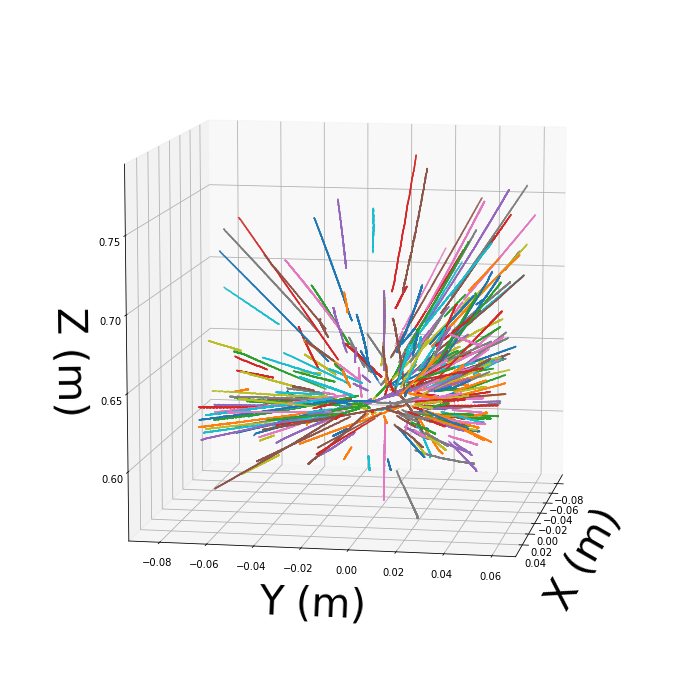

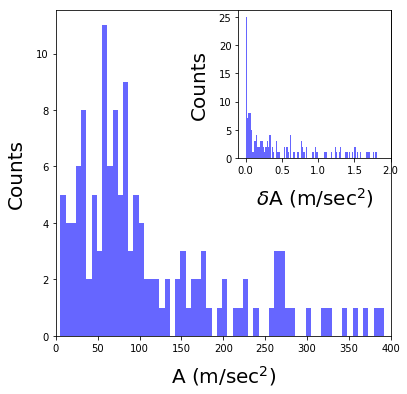

In [8]:
#P2 = P1[P1['A']<100]#Make a cut to remove outliner
#mu, std = stats.norm.fit(P1['A'])
fig = plt.figure(figsize = (6,6))  # make a new figure
P2 = P1[P1['AUnc']<2]
#mu, std = stats.norm.fit(P2['A'])
plt.hist(P2['A'], bins=100, normed=0, alpha=0.6, color='b')
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#x=np.linspace(0,100,100)
#p = stats.norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlim(0,400)
plt.xlabel('A (m/sec$^2$)', fontsize=20,labelpad=10)
plt.ylabel('Counts', fontsize=20,labelpad=10)
#print(mu,std)
ax1 = fig.add_subplot(2, 2, 2)
ax1.hist(P2['AUnc'], bins=100, normed=0, alpha=0.6, color='b')
ax1.set_xlim(-0.1,2)
ax1.set_xlabel('$\delta$A (m/sec$^2$)', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts', fontsize=20,labelpad=10)
plt.savefig("3DFitStatAll_All.pdf")
plt.show()

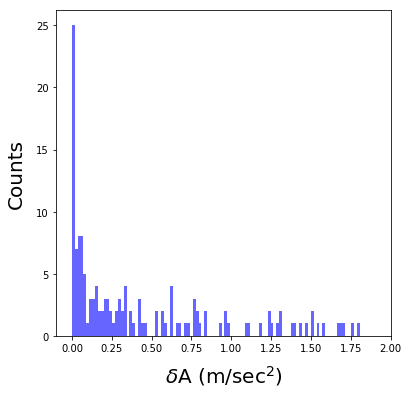

In [9]:
#P2 = P1[P1['A']<100]#Make a cut to remove outliner
#mu, std = stats.norm.fit(P1['A'])
fig = plt.figure(figsize = (6,6))  # make a new figure
plt.hist(P2['AUnc'], bins=100, normed=0, alpha=0.6, color='b')
#xmin, xmax = plt.xlim()
#x = np.linspace(xmin, xmax, 100)
#x=np.linspace(0,100,100)
#p = stats.norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlim(-0.1,2)
plt.xlabel('$\delta$A (m/sec$^2$)', fontsize=20,labelpad=10)
plt.ylabel('Counts', fontsize=20,labelpad=10)
plt.savefig("3DFitStatAllUnc_All.pdf")
plt.show()

In [41]:
P2['SHOT'].unique()

array([118, 119, 120, 232])

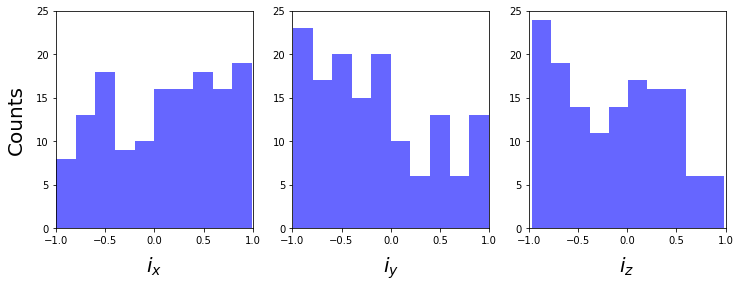

In [24]:
fig = plt.figure(figsize = (12,4))  # make a new figure
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(P2['iX'], bins=10, normed=0, alpha=0.6, color='b')
ax1.set_xlim(-1,1)
ax1.set_ylim(0,25)
ax1.set_xlabel('$i_{x}$', fontsize=20,labelpad=10)
ax1.set_ylabel('Counts', fontsize=20,labelpad=10)
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(P2['iY'], bins=10, normed=0, alpha=0.6, color='b')
ax2.set_xlim(-1,1)
ax2.set_ylim(0,25)
ax2.set_xlabel('$i_{y}$', fontsize=20,labelpad=10)
#ax2.set_ylabel('Counts', fontsize=20,labelpad=10)
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(P2['iZ'], bins=10, normed=0, alpha=0.6, color='b')
ax3.set_xlim(-1,1)
ax3.set_ylim(0,25)
ax3.set_xlabel('$i_{z}$', fontsize=20,labelpad=10)
#ax3.set_ylabel('Counts', fontsize=20,labelpad=10)
#plt.savefig("3DFitStatAllUnc_ix.pdf")
plt.show()

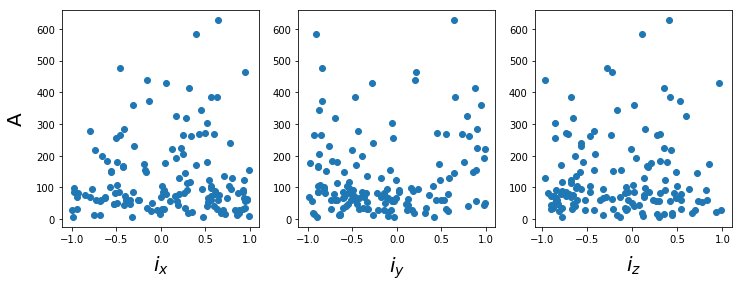

In [30]:
fig = plt.figure(figsize = (12,4))  # make a new figure
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(P2['iX'],P2['A'])
#ax1.set_xlim(-1,1)
#ax1.set_ylim(0,25)
ax1.set_ylabel('A', fontsize=20,labelpad=10)
ax1.set_xlabel('$i_{x}$', fontsize=20,labelpad=10)
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(P2['iY'],P2['A'])
#ax2.set_xlim(-1,1)
#ax2.set_ylim(0,25)
#ax2.set_ylabel('A', fontsize=20,labelpad=10)
ax2.set_xlabel('$i_{y}$', fontsize=20,labelpad=10)
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(P2['iZ'],P2['A'])
#ax3.set_xlim(-1,1)
#ax3.set_ylim(0,25)
#ax3.set_ylabel('A', fontsize=20,labelpad=10)
ax3.set_xlabel('$i_{z}$', fontsize=20,labelpad=10)
#plt.savefig("3DFitStatAllUnc_ix.pdf")
plt.show()